In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##4.case box içinde ivmelendirdik ileri-geri

In [43]:
df = pd.read_csv('DistanceLogTest4.csv')



In [44]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,2.92,0.0,1.5,1.5,-0.0003,1.5003,0.0003,1.4997,0.0000,1.4997
1,3.02,0.0,1.5,1.5,0.0001,1.5003,0.0000,1.5000,0.0003,1.4997
2,3.14,0.0,1.5,1.5,-0.0002,1.5004,0.0001,1.4999,0.0002,1.4997
3,3.24,0.0,1.5,1.5,-0.0003,1.5002,0.0002,1.4998,0.0001,1.4997
4,3.34,0.0,1.5,1.5,0.0000,1.5003,-0.0002,1.5002,0.0005,1.4997


In [45]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,346.000000,346.0,345.0,345.0,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02
mean,21.767514,0.0,1.5,1.5,-0.150284,1.687910,0.328429,1.660187,0.160480,1.499700e+00
std,10.915114,0.0,0.0,0.0,0.393112,0.419884,1.046461,0.310369,0.310368,2.223671e-16
min,2.920000,0.0,1.5,1.5,-1.149700,1.494400,-0.346700,1.171800,-0.327900,1.499700e+00
25%,12.357500,0.0,1.5,1.5,-0.031600,1.500200,-0.335500,1.500000,0.000300,1.499700e+00
50%,21.740000,0.0,1.5,1.5,0.000000,1.502200,-0.000100,1.500200,0.000500,1.499700e+00
75%,31.165000,0.0,1.5,1.5,0.024600,1.621600,0.315800,1.836700,0.337000,1.499700e+00
max,40.630000,0.0,1.5,1.5,0.066200,2.751800,2.933600,2.223000,0.723300,1.499700e+00


In [46]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             346 non-null    float64
 1   ObjectX          346 non-null    float64
 2   ObjectY          345 non-null    float64
 3   ObjectZ          345 non-null    float64
 4   CameraX          345 non-null    float64
 5   CameraY          345 non-null    float64
 6   CameraZ          345 non-null    float64
 7   Distance         345 non-null    float64
 8   DeltaDistance    345 non-null    float64
 9   InitialDistance  345 non-null    float64
dtypes: float64(10)
memory usage: 27.2 KB


In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [49]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

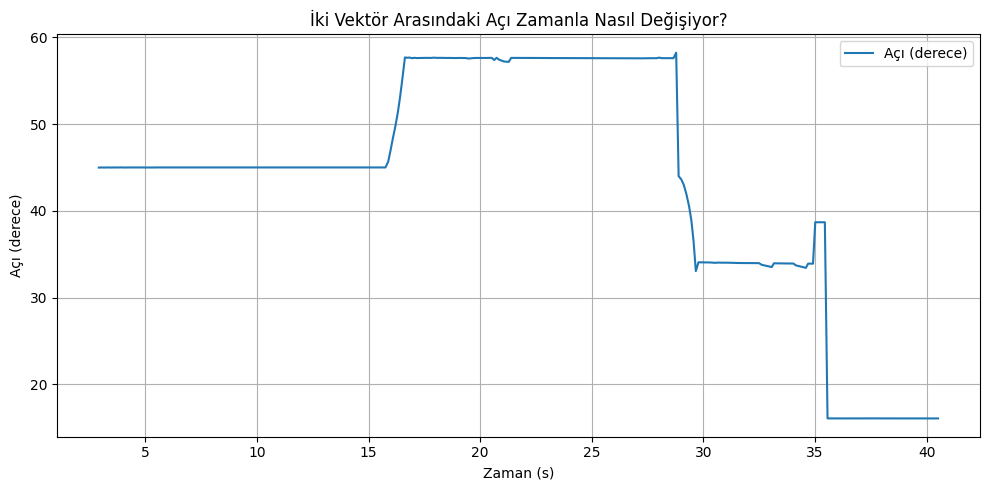

In [50]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

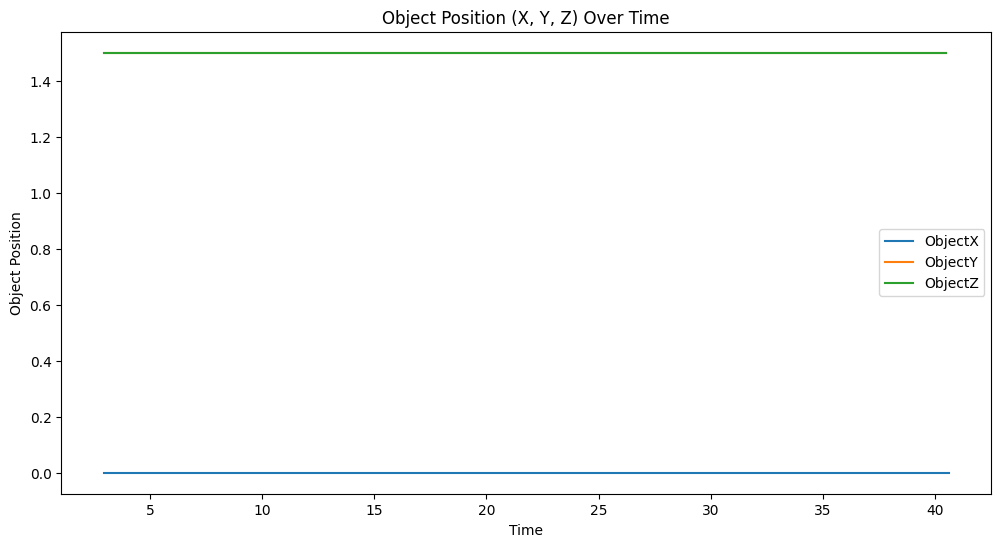

In [51]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

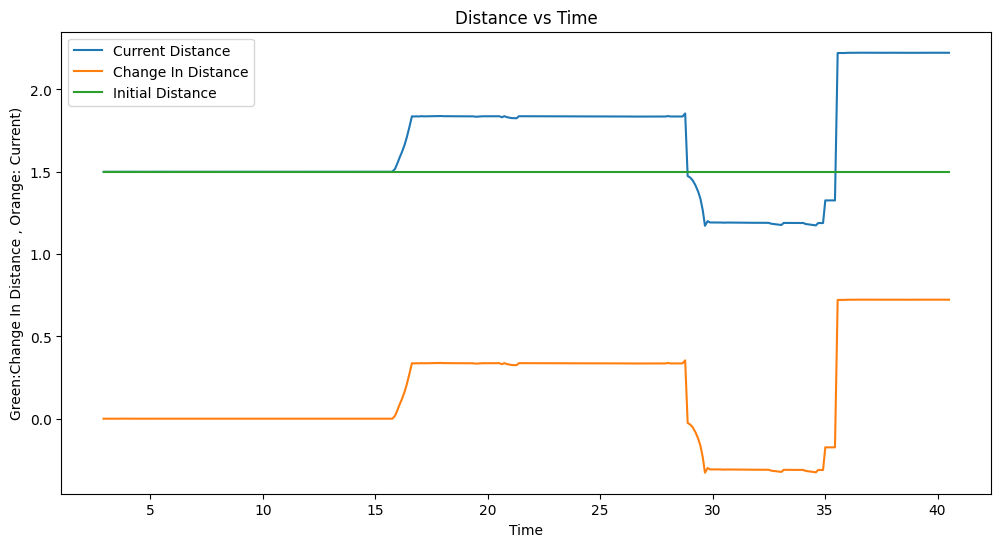

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






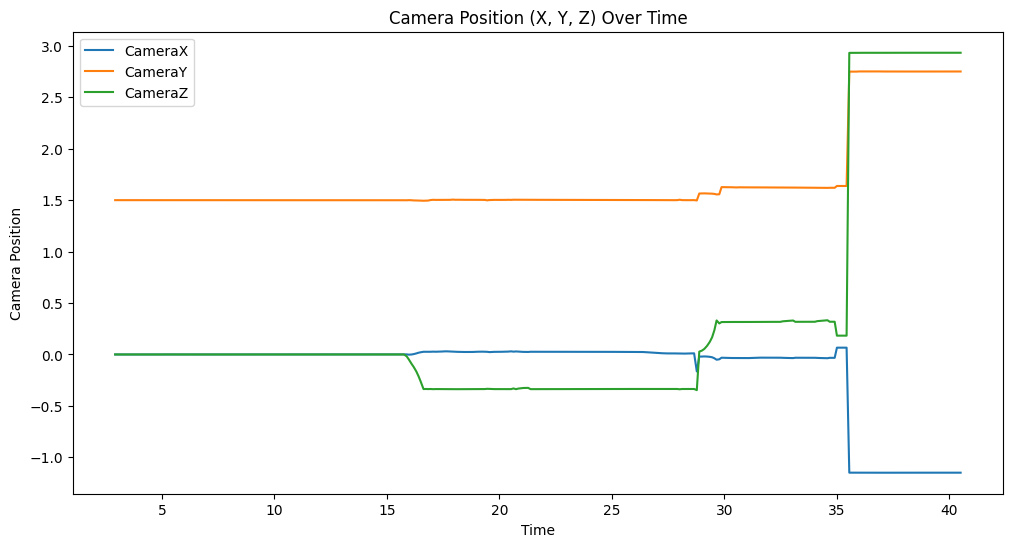

In [53]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

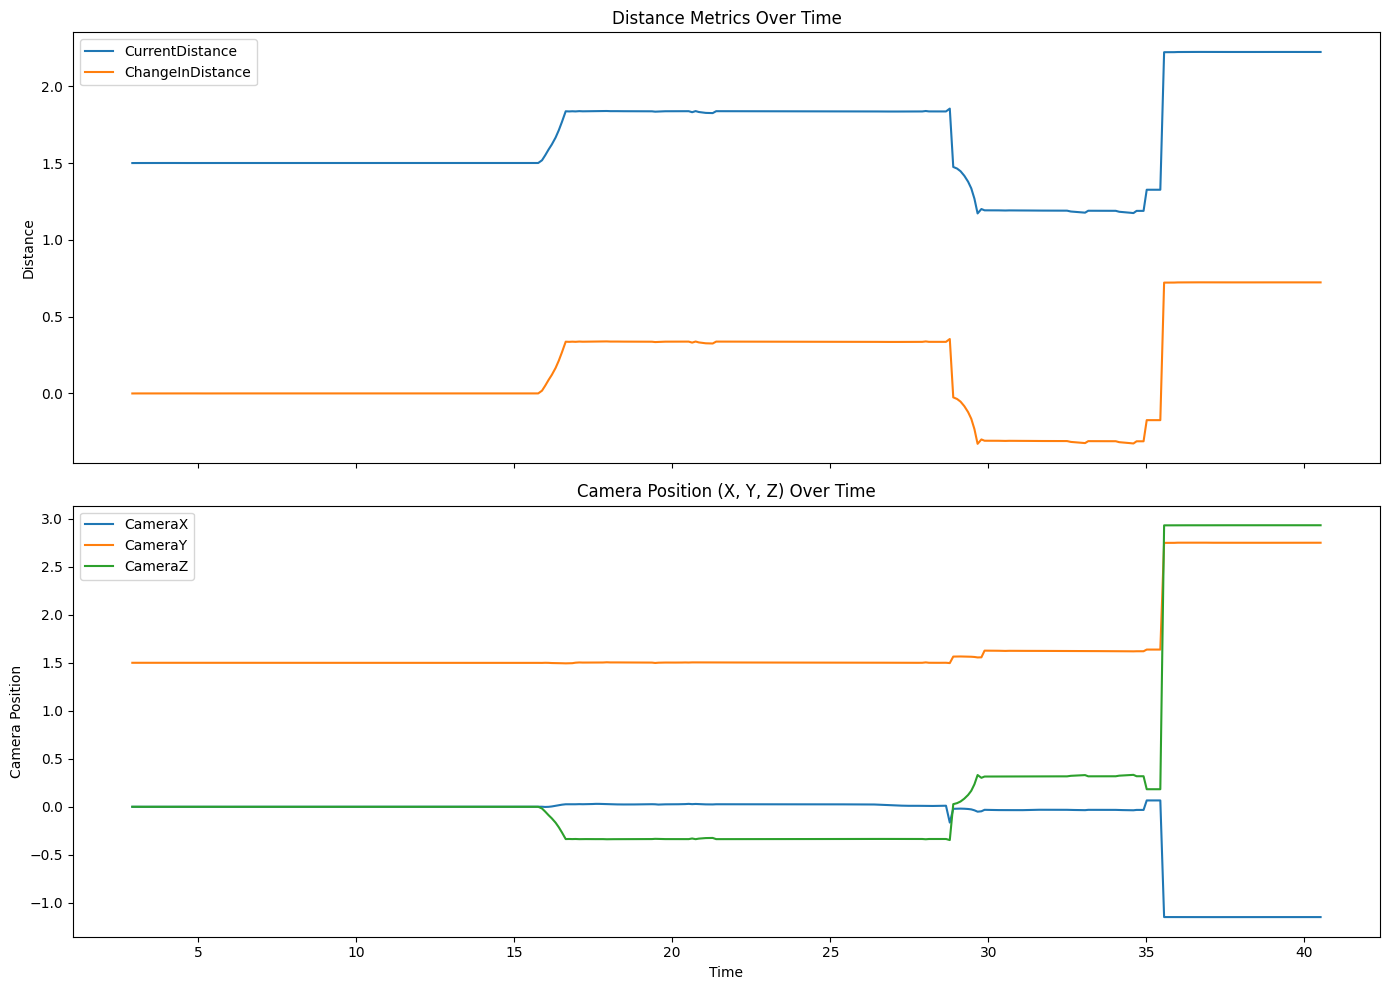

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()